<a href="https://colab.research.google.com/github/Unnati03032001/Bank-Customer-Churn-Prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title:Bank Customer Churn Prediction**

## **About this Project:**
This is EDA project using Python Implementation

 Customer churn is the percentage of customers that stopped using bank's product or service during a certain time frame.


# **Key Steps:**



*   Importing Necessary Packages
*   Statistical Summary of the Dataset
*   Dropping Irrelevant Features
* Data Visualization
*   Detecting Outliers using Tukey Boxplot
*   Checking Correlation with Heatmap









# **Attribute Information:**

*   **RowNumber:** corresponds to the record (row) number and has no effect on the output.
*   **CustomerId:** contains random values and has no effect on customer leaving the bank.
*   **Surname:** the surname of a customer has no impact on their decision to leave the bank.
*   **CreditScore:** can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
*   **Geography:** a customer’s location can affect their decision to leave the bank.
*   **Gender:** it’s interesting to explore whether gender plays a role in a customer leaving the bank.
*   **Age:** this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
*   **Tenure:** refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* **Balance:** also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* **NumOfProducts:** refers to the number of products that a customer has purchased through the bank.
* **HasCrCard:** denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* **IsActiveMember:** active customers are less likely to leave the bank.
* **EstimatedSalary:** as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* **Exited:**whether or not the customer left the bank



# **Importing Necessary Packages**

In [1]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [6]:
# read the dataset
data=pd.read_csv("churn.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
# first five row of the dataset
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# last five row of the dataset
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [9]:
#check the number of row and columns
data.shape

(10000, 14)

In [10]:
# print all the nampe of columns which present in dataset
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

# **The statistical summary of the dataset**

In [11]:
#checking datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
data.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [13]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Dropping Irrelevant Feature**

RowNumber, CustomerId and Surname are irrelivant, so we drop those features.

In [15]:
data_new=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

# **Data Visualization**

In [16]:
data_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
#check the unique value
data_new['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [18]:
#count the number of value present
data_new['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

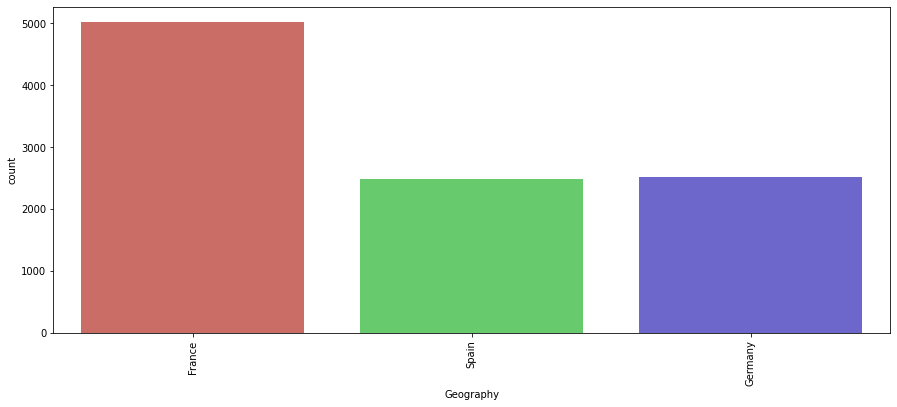

In [19]:
#plot the countplot using column geography 
plt.figure(figsize=(15,6))
sns.countplot('Geography',data=data_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [20]:
#for better visualization we immport plotly
import plotly.express as px

In [21]:
#plot the histogram using column geography 
fig1=px.histogram(data_new,x='Geography',color='Geography')
fig1.show()

In [22]:
#check the unique value
data_new['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
#count the number of value present
data_new['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

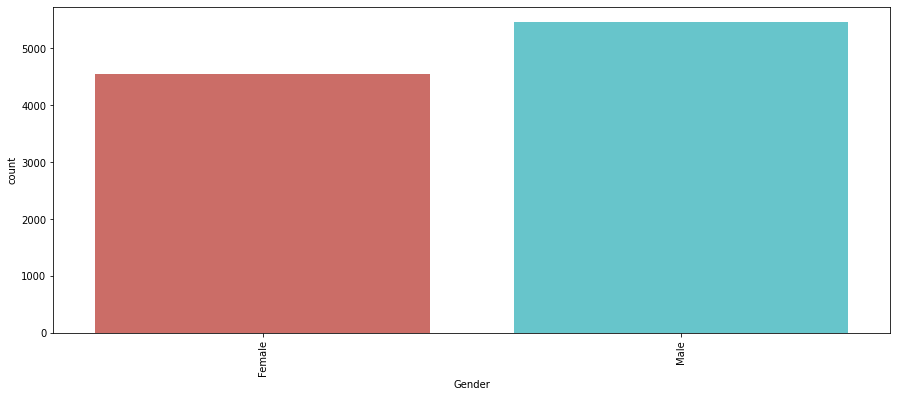

In [24]:
#plot the countplot using column gender
plt.figure(figsize=(15,6))
sns.countplot('Gender',data=data_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [25]:
#plot the histograme using column gender 
fig2=px.histogram(data_new,x='Gender',color='Gender')
fig2.show()

In [26]:
data_new['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [27]:
data_new['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

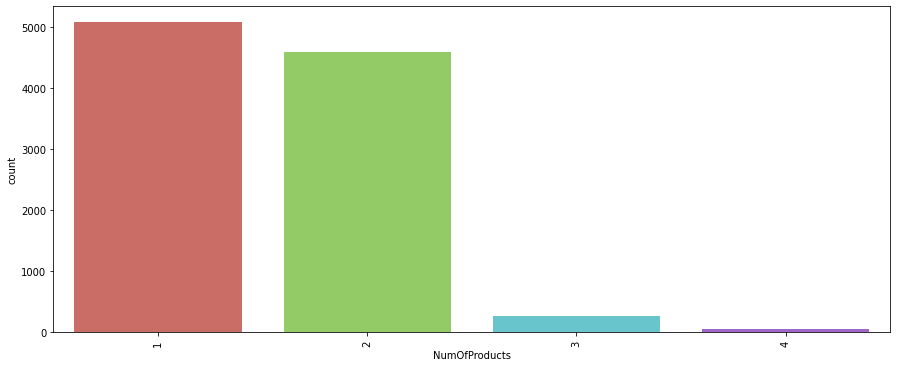

In [28]:
plt.figure(figsize=(15,6))
sns.countplot('NumOfProducts',data=data_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [29]:
fig3=px.histogram(data_new,x='NumOfProducts',color='NumOfProducts')
fig3

In [30]:
data_new['HasCrCard'].unique()

array([1, 0])

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

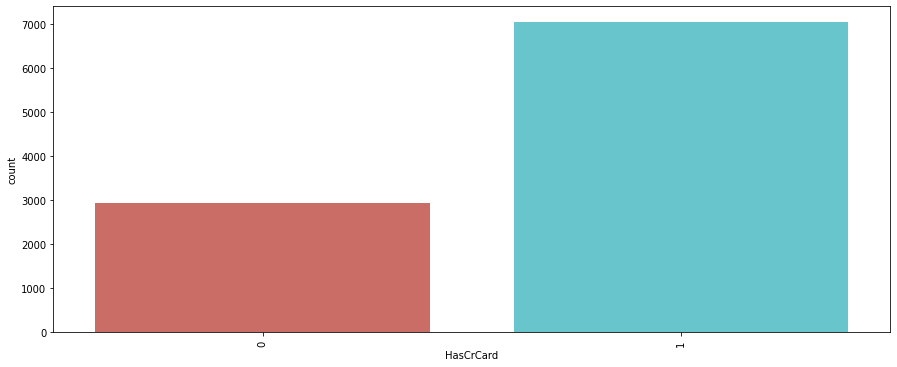

In [31]:
plt.figure(figsize=(15,6))
sns.countplot('HasCrCard',data=data_new,palette='hls')
plt.xticks(rotation=90)


In [32]:
fig4=px.histogram(data_new,x='HasCrCard',color='HasCrCard')
fig4.show()


In [33]:
data_new['IsActiveMember'].unique()

array([1, 0])

In [34]:
data_new['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

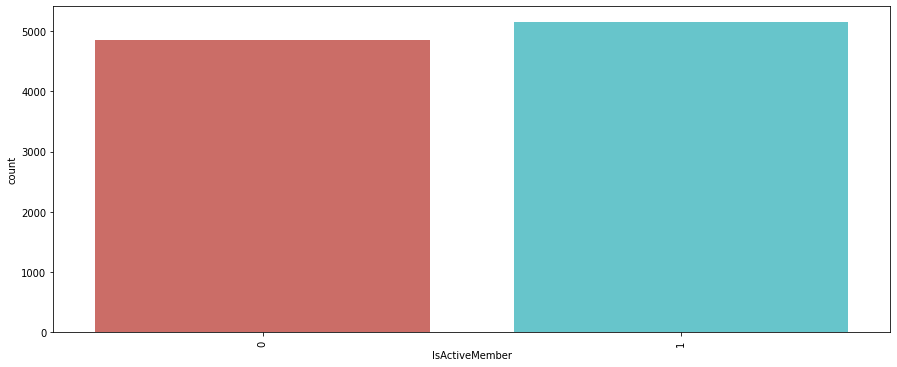

In [35]:
plt.figure(figsize=(15,6))
sns.countplot('IsActiveMember',data=data_new,palette='hls')
plt.xticks(rotation=90)


In [36]:
fig5=px.histogram(data_new,x='IsActiveMember',color='IsActiveMember')
fig5

In [37]:
data_new['Exited'].unique()

array([1, 0])

In [38]:
data_new['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

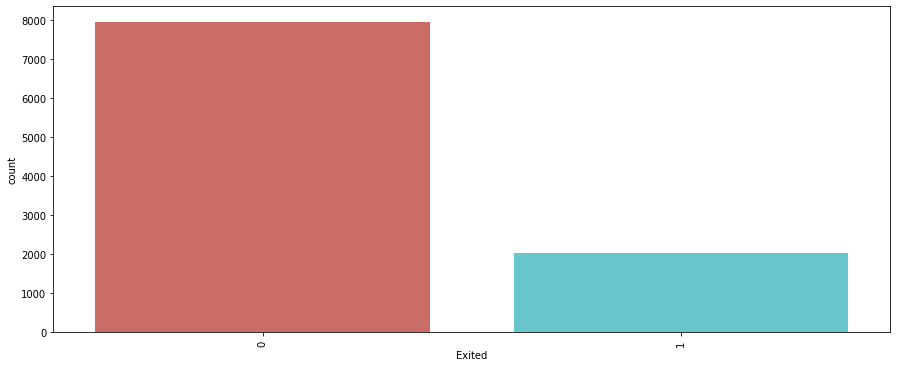

In [39]:
plt.figure(figsize=(15,6))
sns.countplot('Exited',data=data_new,palette='hls')
plt.xticks(rotation=90)


In [40]:
fig6=px.histogram(data_new,x='Exited',color='Exited')

In [41]:
fig6

In [43]:
#plot pie chart using column exited 
values=data_new['Exited'].value_counts()
names=['Retained','Exited']
fig7=px.pie(values=values,names=names)
fig7.show()

compare to retained people exited people less

In [44]:
data_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [45]:
#make new dataset for numeric value 
data_new_numeric=data_new[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

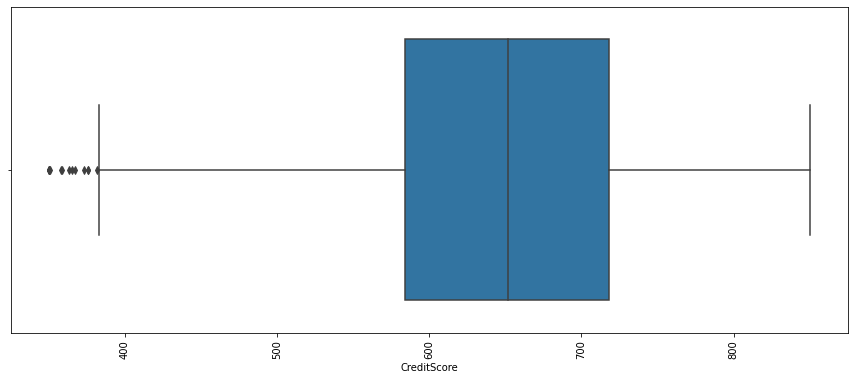

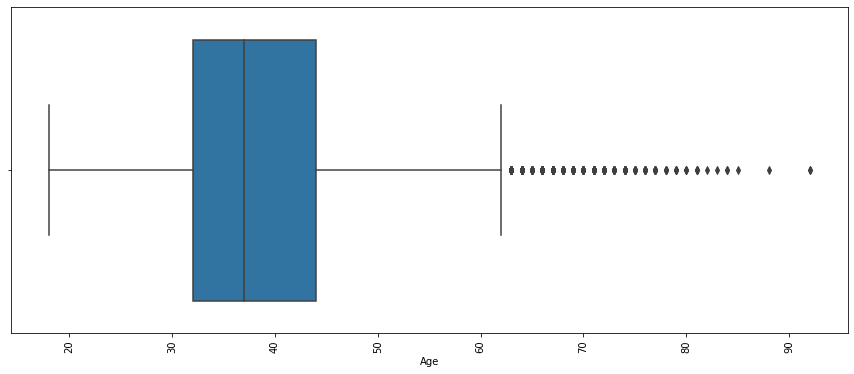

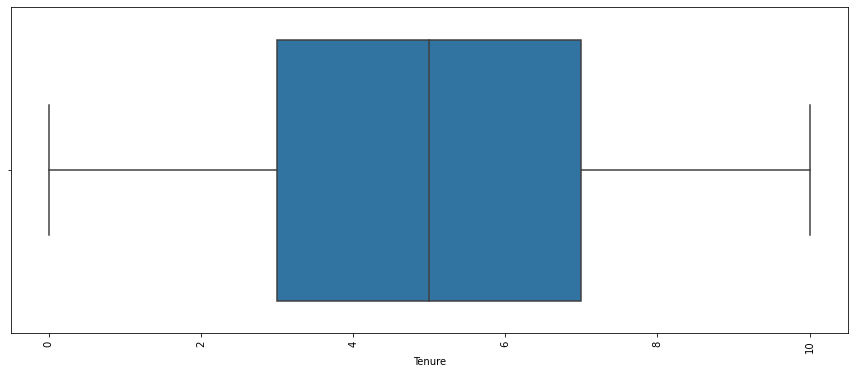

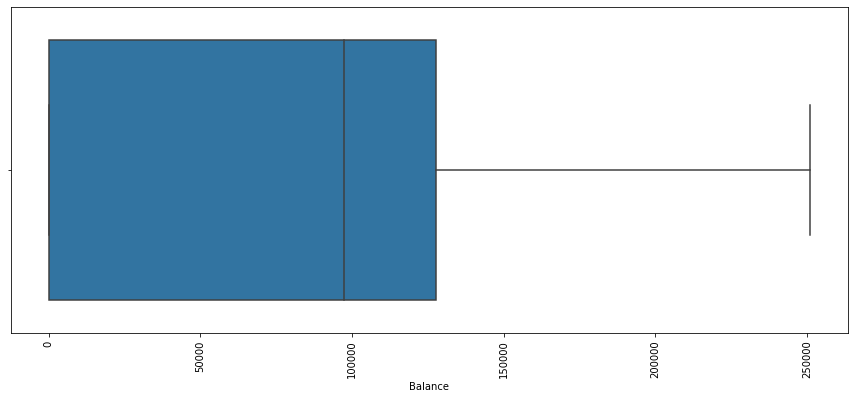

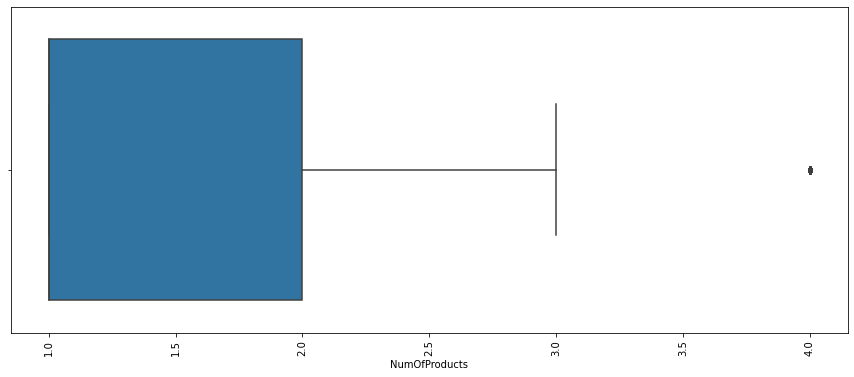

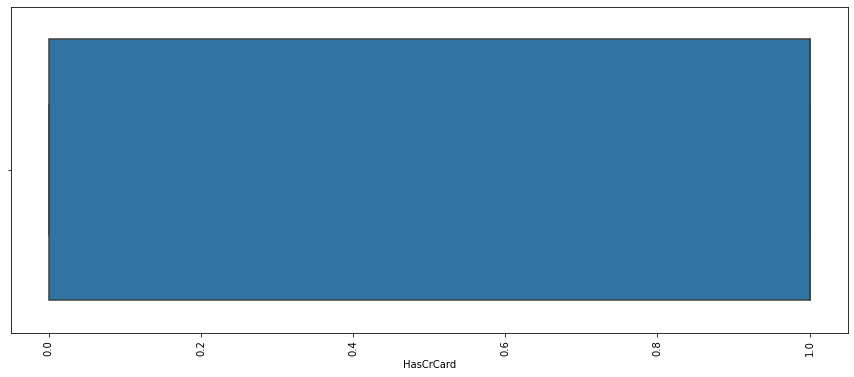

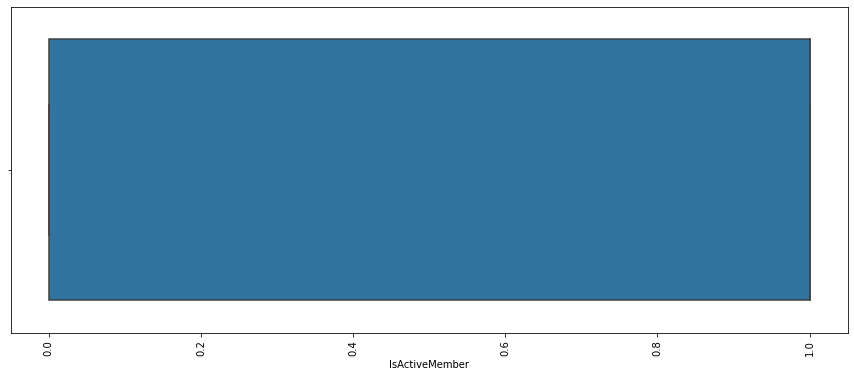

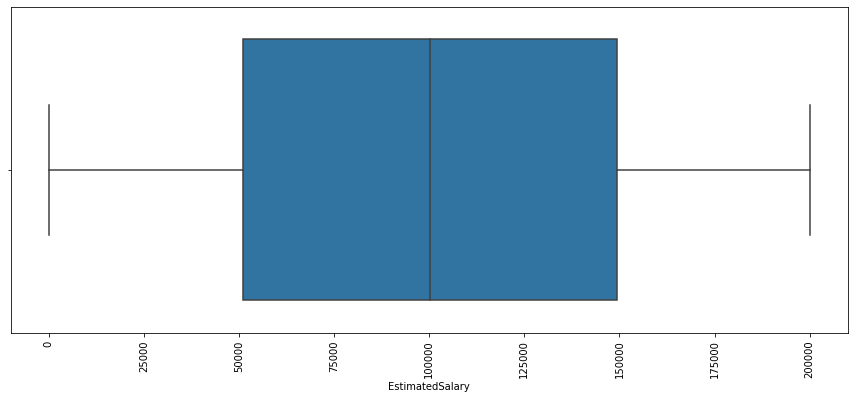

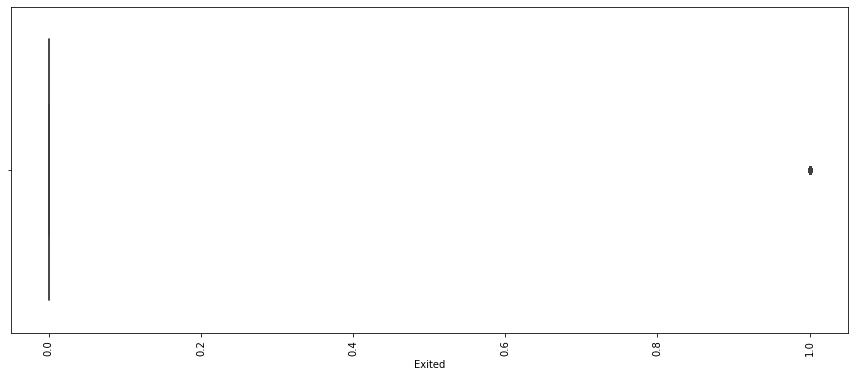

In [46]:
#using numeric data set plot boxplot
for i in data_new_numeric.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data_new_numeric[i],data=data_new_numeric)
    plt.xticks(rotation=90)
    plt.show()

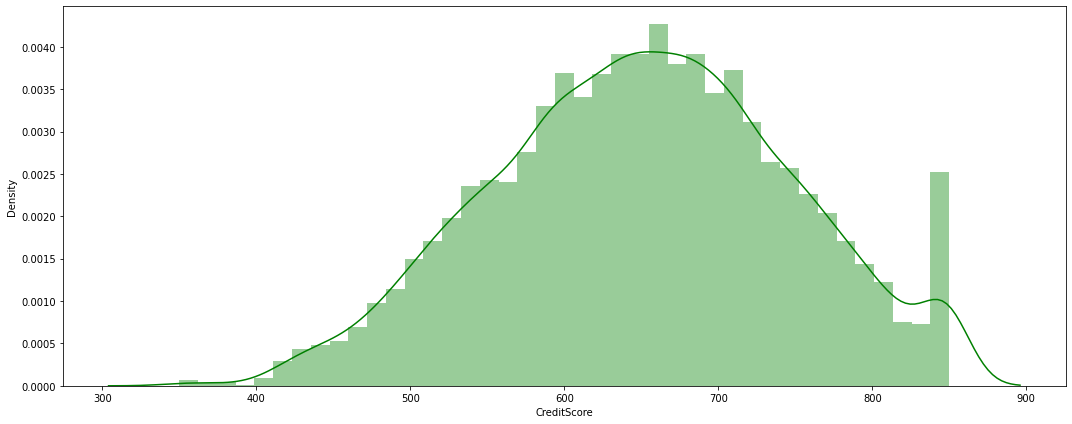

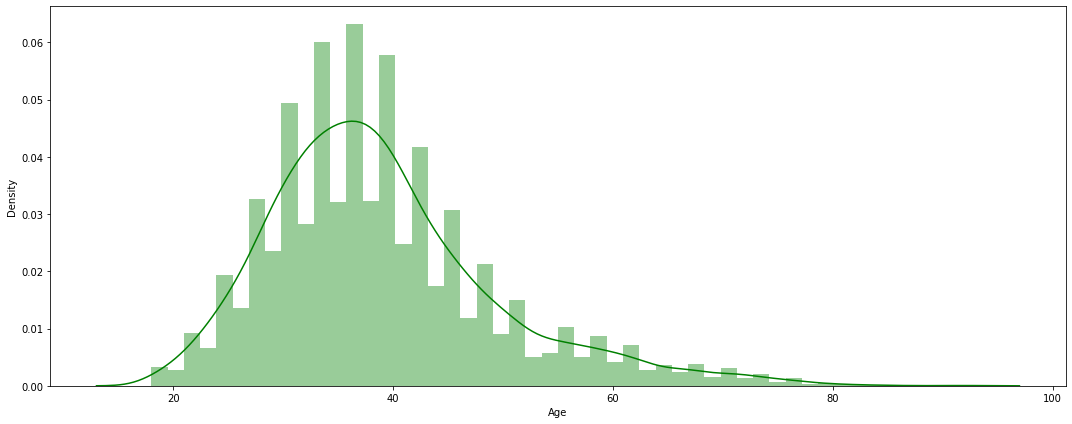

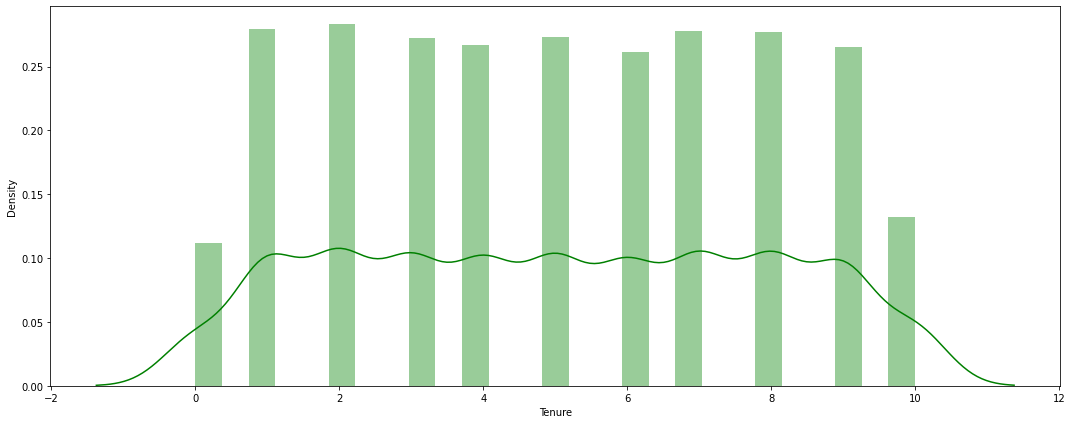

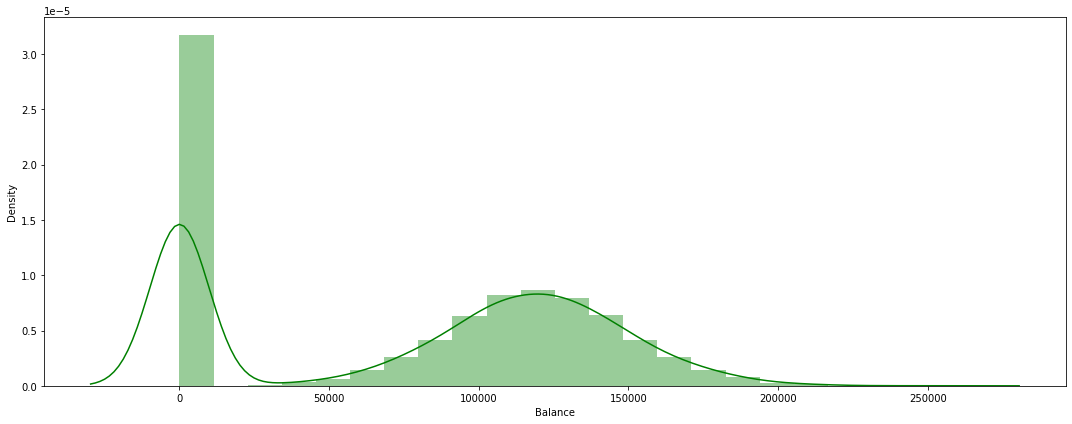

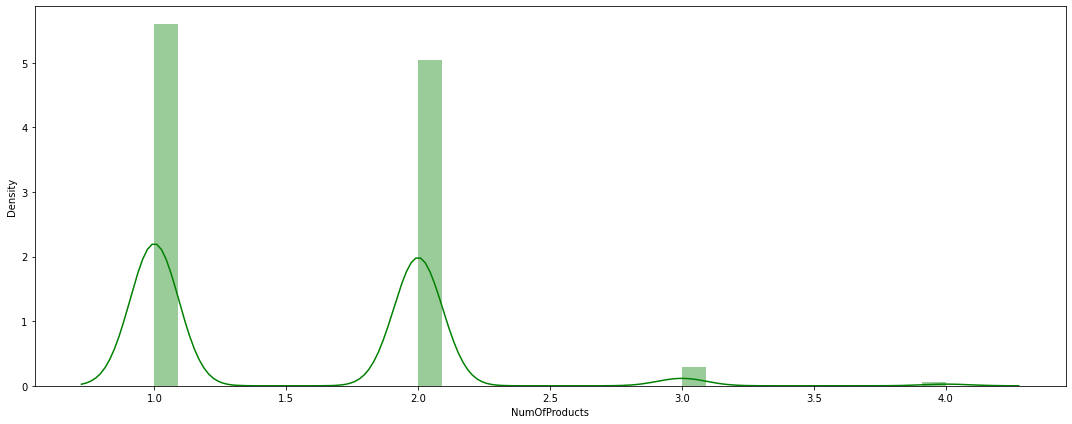

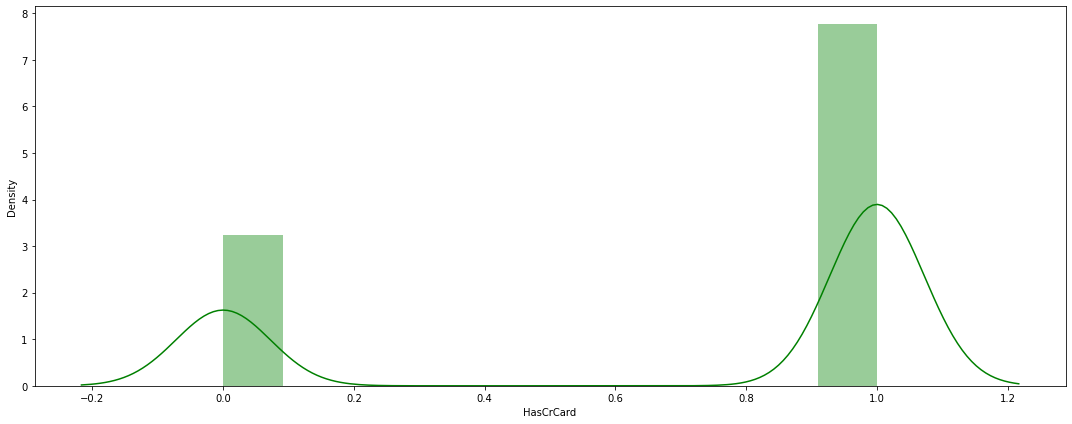

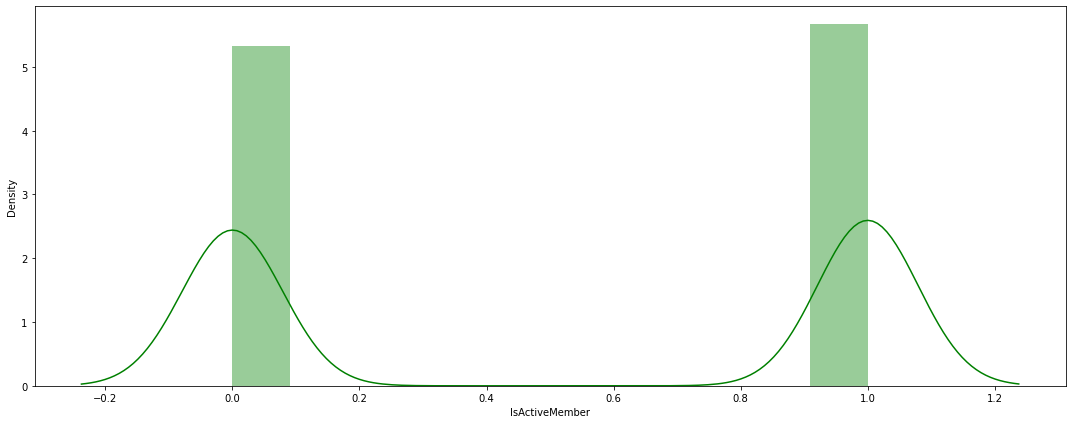

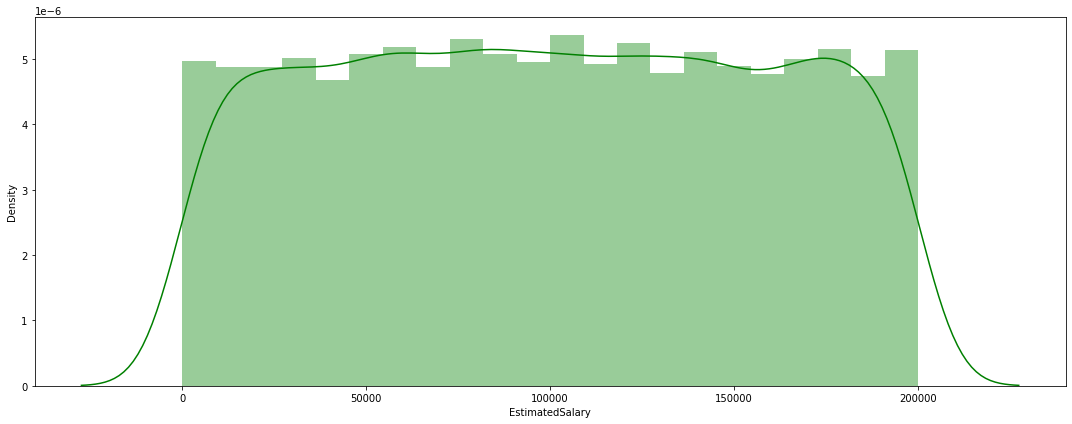

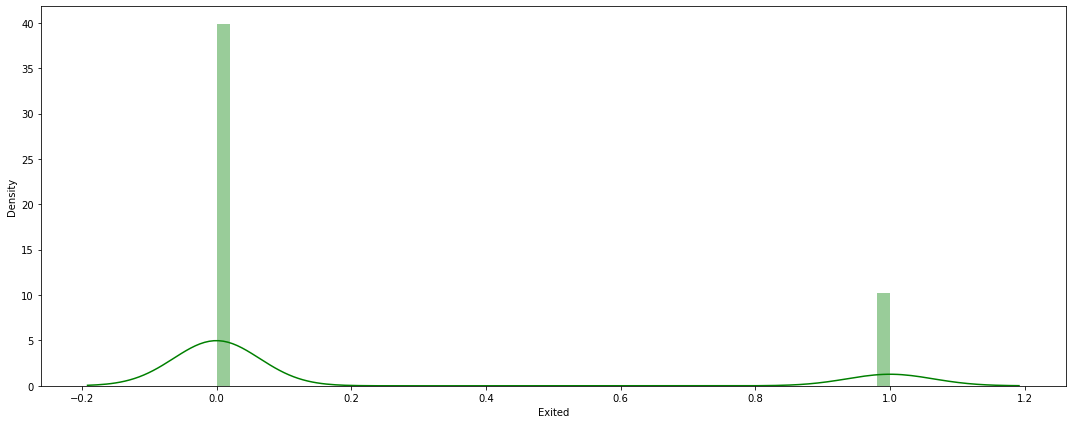

In [47]:
#using numeric data set plot distplot
for i in data_new_numeric.columns:
    plt.figure(figsize=(15,6))
    sns.distplot(data_new_numeric[i],color='g')
    plt.tight_layout()

In [48]:
#drop the column exited
data_exited=data_new.drop(columns='Exited')

In [49]:
data_exited.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [50]:
data_exited.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


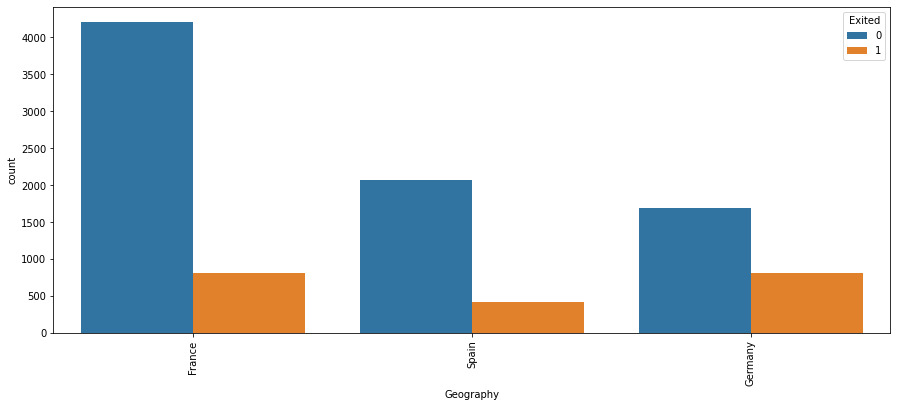

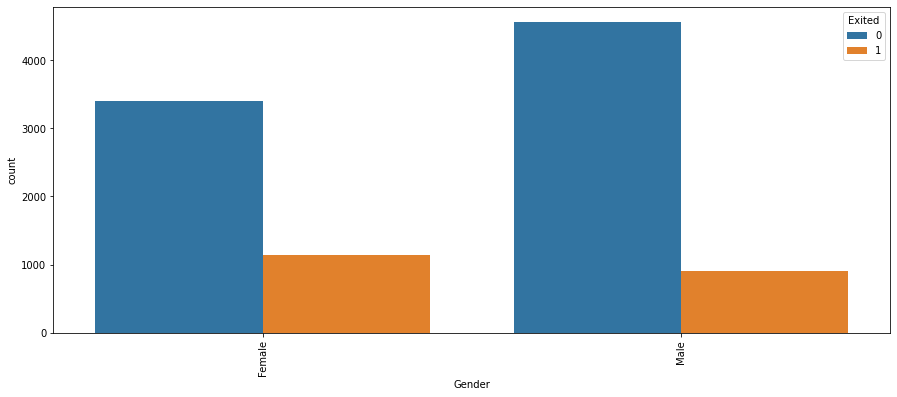

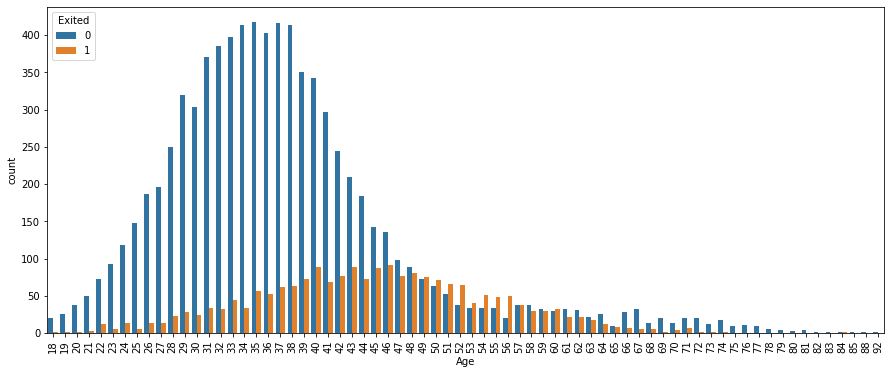

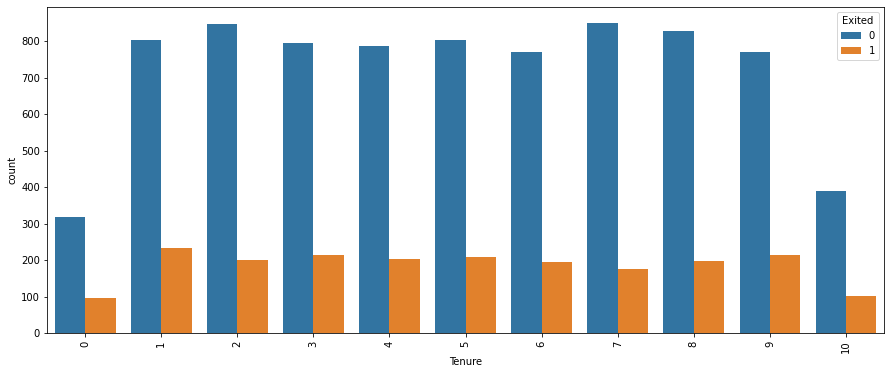

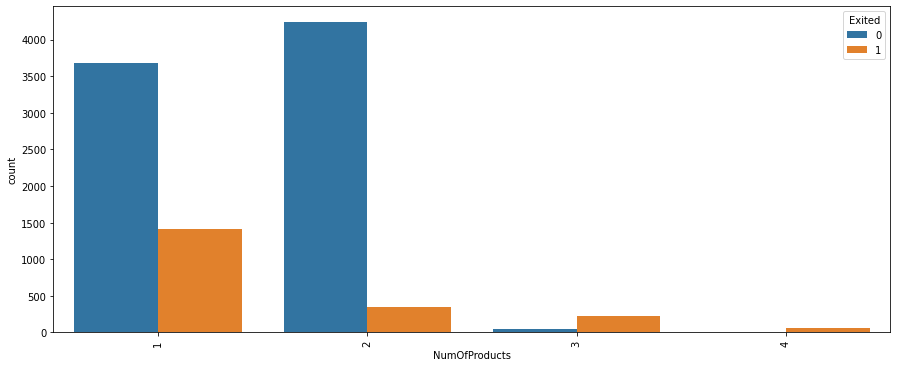

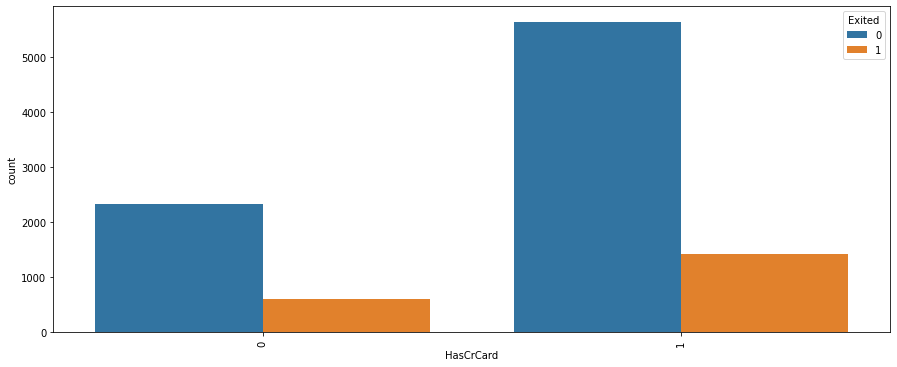

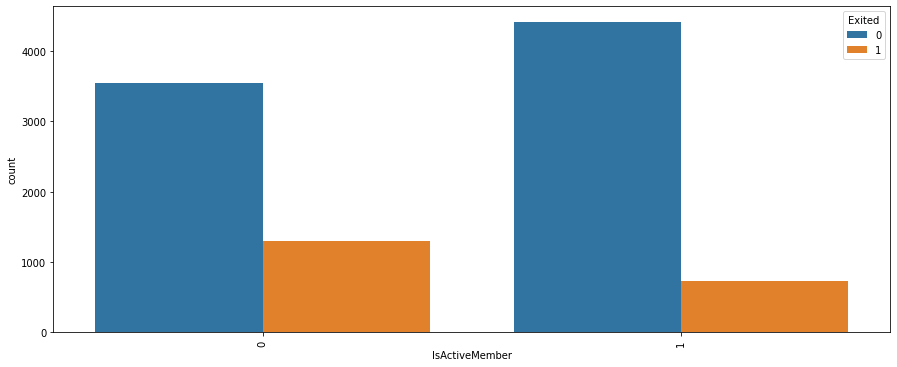

In [67]:
 #using data_exited data set plot countplot
for i in data_exited[['Geography','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]:
    plt.figure(figsize=(15,6))
    sns.countplot(data_exited[i],hue='Exited',data=data_new_numeric)
    plt.xticks(rotation=90)
    plt.show()

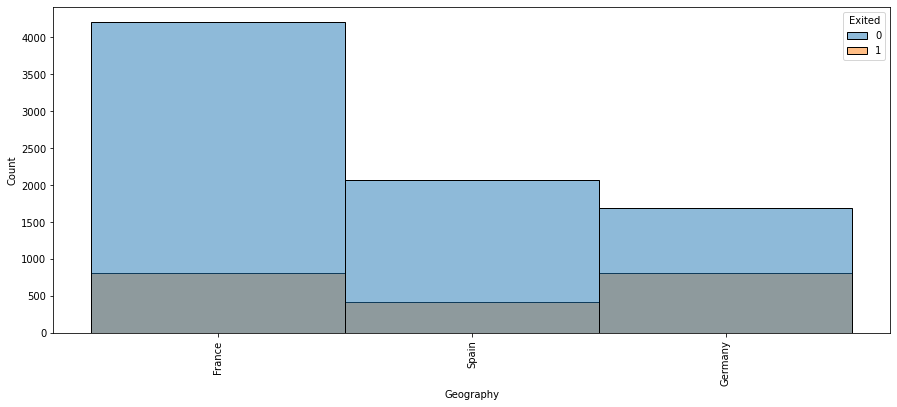

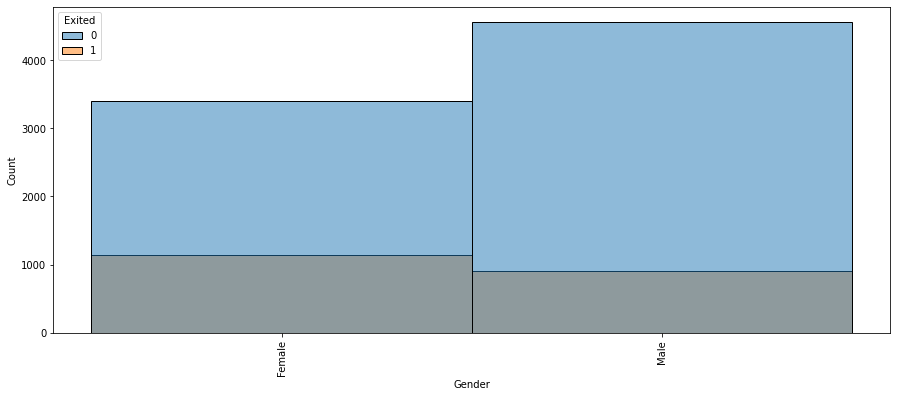

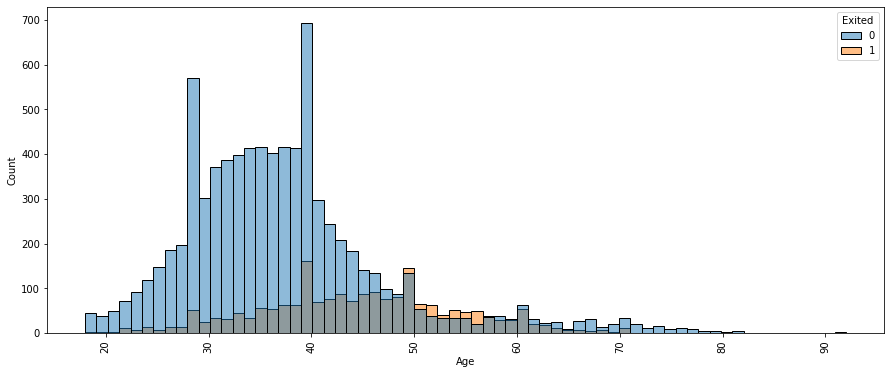

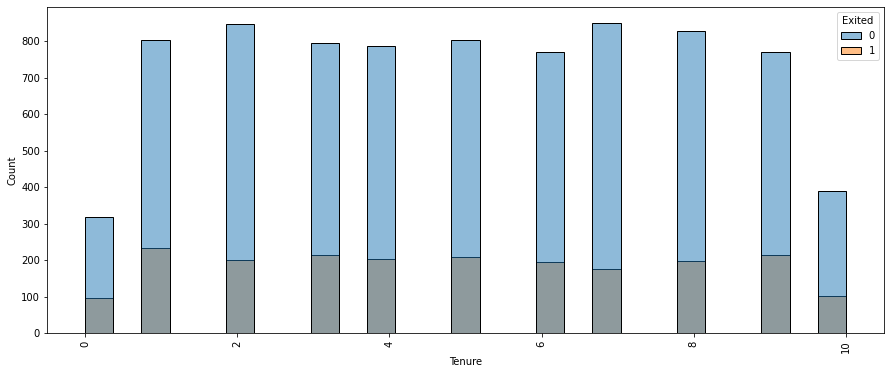

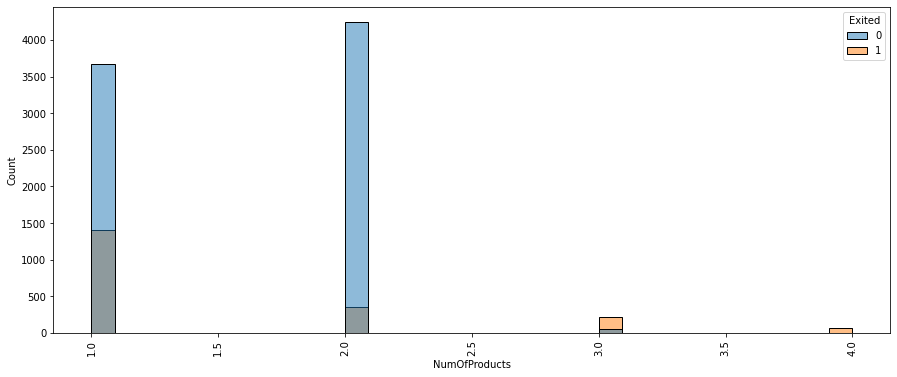

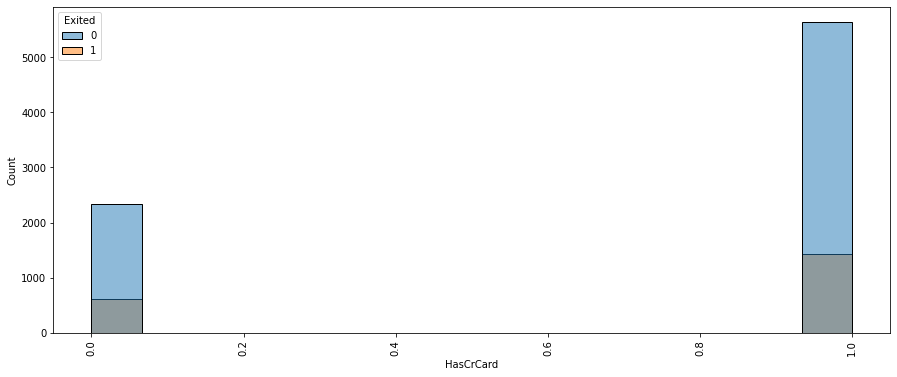

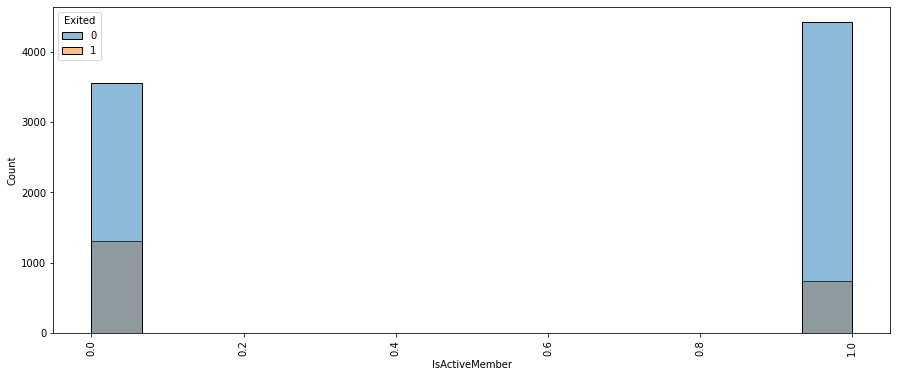

In [52]:
#using data_exited data set plot countplot
for i in data_exited[['Geography','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]:
    plt.figure(figsize=(15,6))
    sns.histplot(data_new_numeric,x=data_exited[i],hue='Exited')
    plt.xticks(rotation=90)
    plt.show()

# **Checking Correlation with Heatmap**


In [53]:
# finding correlation
data_new_numeric.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


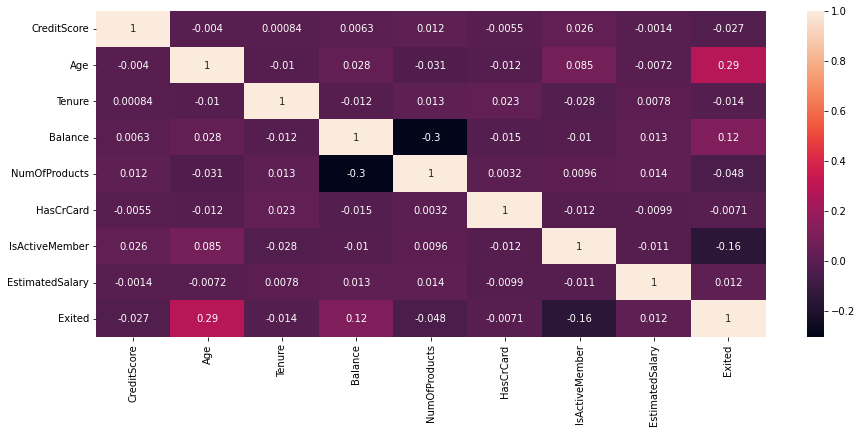

In [54]:
#by heatmap checking correlation
plt.figure(figsize=(15,6))
sns.heatmap(data_new_numeric.corr(),annot=True)
plt.show()

In [55]:
# we give range in age groups
data_new['age_groups']=pd.cut(data_new['Age'],bins=6)

In [56]:
#copy the data 
data_new_age=data_new.copy()

In [57]:
#in this code we group the column age groups and exited
data_new_age=data_new_age.groupby(['age_groups','Exited']).agg({'Gender':'count'}).reset_index()
data_new_age.columns=['age_groups','Exited','user_count']
data_new_age['Exited']=data_new_age['Exited'].apply(lambda x:'Exited' if x==1 else 'Retained')

In [58]:
data_new_age

,age_groups,Exited,user_count
0,"(17.926, 30.333]",Retained,1820
1,"(17.926, 30.333]",Exited,148
2,"(30.333, 42.667]",Retained,4454
3,"(30.333, 42.667]",Exited,684
4,"(42.667, 55.0]",Retained,1183
5,"(42.667, 55.0]",Exited,911
6,"(55.0, 67.333]",Retained,337
7,"(55.0, 67.333]",Exited,271
8,"(67.333, 79.667]",Retained,155
9,"(67.333, 79.667]",Exited,22


Text(0, 0.5, 'Total User')

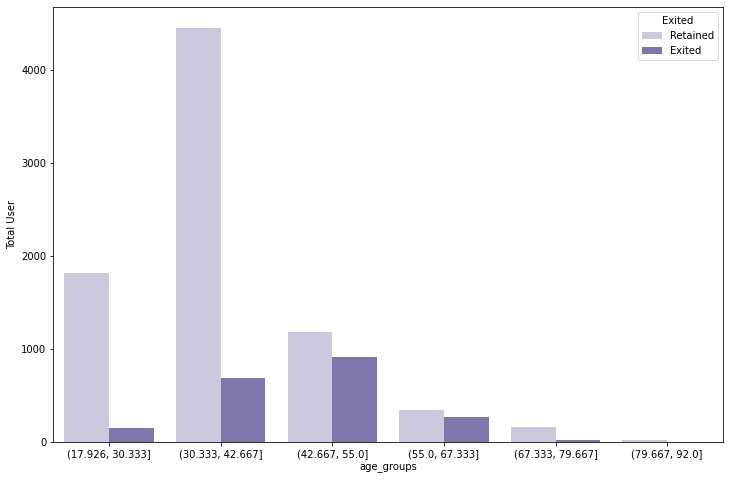

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(data=data_new_age,x='age_groups',y='user_count',hue='Exited',palette='Purples')
plt.ylabel('Total User')

In [60]:
#in this code we group the column geography and exited
data_new_geo=data_new.groupby(['Geography','Exited']).agg({'Gender':'count'}).reset_index()
data_new_geo.columns=['Geography','Exited','user_count']
data_new_geo

,Geography,Exited,user_count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


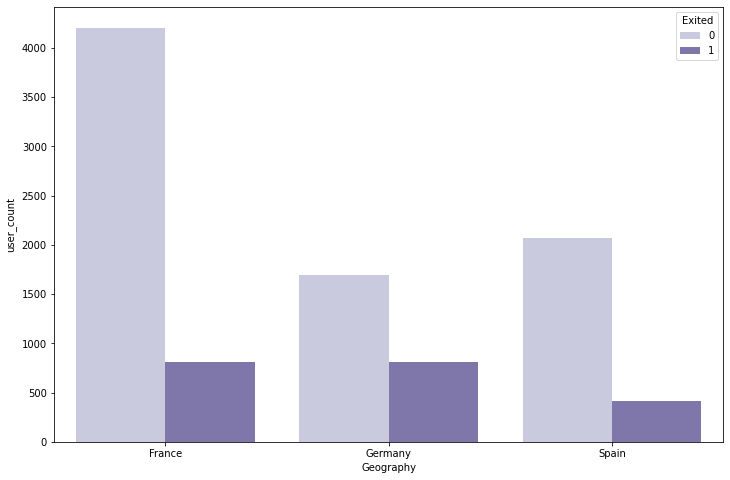

In [61]:
plt.figure(figsize=(12,8))
sns.barplot(data=data_new_geo,x='Geography',y='user_count',hue='Exited',palette='Purples')

In [62]:
#in this code we group the column numof products and exited

data_new_product=data_new.groupby(['NumOfProducts','Exited']).agg({'Gender':'count'}).reset_index()
data_new_product.columns=['NumOfProducts','Exited','user_count']
data_new_product

,NumOfProducts,Exited,user_count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


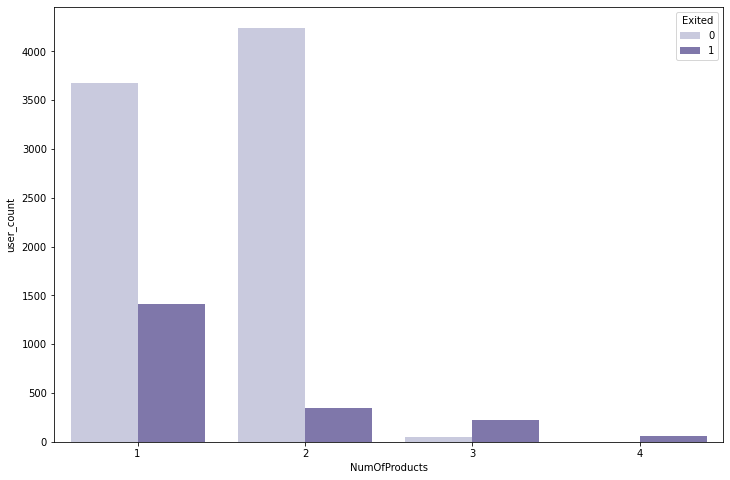

In [63]:
plt.figure(figsize=(12,8))
sns.barplot(data=data_new_product,x='NumOfProducts',y='user_count',hue='Exited',palette='Purples')

In [64]:
# we divide the credit score in to particular range
data_new['CreditScoreNew']=pd.cut(data_new['CreditScore'],bins=6)

In [65]:
#in this code we group the column age credit score and exited

data_new_creditscore=data_new.groupby(['CreditScoreNew','Exited']).agg({'Gender':'count'}).reset_index()
data_new_creditscore.columns=['CreditScoreNew','Exited','user_count']
data_new_creditscore

,CreditScoreNew,Exited,user_count
0,"(349.5, 433.333]",0,67
1,"(349.5, 433.333]",1,40
2,"(433.333, 516.667]",0,640
3,"(433.333, 516.667]",1,162
4,"(516.667, 600.0]",0,1694
5,"(516.667, 600.0]",1,463
6,"(600.0, 683.333]",0,2560
7,"(600.0, 683.333]",1,633
8,"(683.333, 766.667]",0,2013
9,"(683.333, 766.667]",1,496


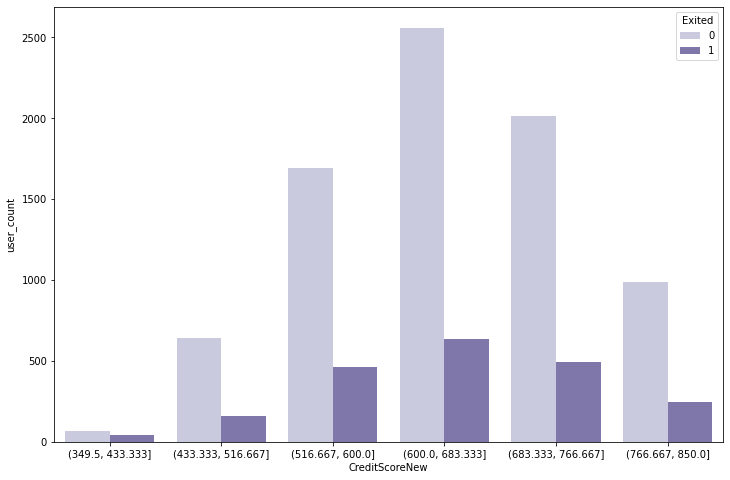

In [66]:
plt.figure(figsize=(12,8))
sns.barplot(data=data_new_creditscore,x='CreditScoreNew',y='user_count',hue='Exited',palette='Purples')
plt.show()